# DataCamp - Natural Language Processing Fundamentals in Python

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Natural Language Processing Fundamentals in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter, defaultdict
import itertools

In [3]:
import re

# nltk.download()
import nltk  
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
import spacy
import polyglot
from polyglot.text import Text

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

##    CHAPTER 1  - Regular expressions & word tokenization


#### Exercício 1 - Introduction to regular expressions

<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 2), match='hi'>
['Split', 'on', 'spaces.']


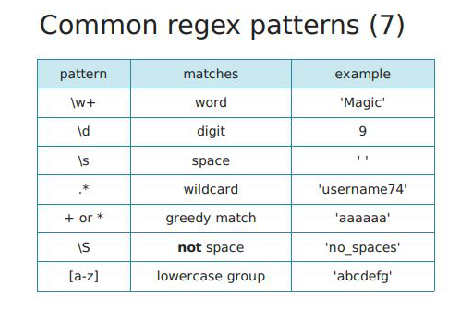

In [4]:
#vídeo

# What is Natural Language Processing?

# Field of study focused on making sense of language
#  - Using statistics and computers
# You will learn the basics of NLP
#  - Topic identification
#  - Text classification
# NLP applications include:
#  - Chatbots
#  - Translation
#  - Sentiment analysis
#  - ... and many more!


# What exactly are regular expressions?

# Strings with a special syntax
# Allow us to match patterns in other strings
# Applications of regular expressions:
#  - Find all web links in a document
#  - Parse email addresses, remove/replace unwanted characters

import re

print(re.match('abc', 'abcdef'))

word_regex = '\w+'
print(re.match(word_regex, 'hi there!'))

# Common Regex patterns

# pattern      matches         example
#   \w+          word          'Magic'
#   \d           digit            9
#   \s           space           ' '
#   .*         wildcard       'username74'
#  + or *     greedy match     'aaaaaa
#   \S          not space     'no_spaces'
#  [a-z]   lowercase group     'abcdefg'


# Python's re Module

# re module
#  - split: split a string on regex
#  - findall: find all patterns in a string
#  - search: search for a pattern
#  - match: match an entire string or substring based on a pattern
#  - Pattern first, and the string second
#  - May return an iterator, string, or match object

print(re.split('\s+', 'Split on spaces.'))

imagem = plt.imread(data_folder + "common_regex_patterns.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

Exercício 2

In [5]:
# Which pattern?

import re

# Which of the following Regex patterns results in the following text?
my_string = "Let's write RegEx!"

re.findall(r'\w+', my_string)


['Let', 's', 'write', 'RegEx']

Exercício 3

In [6]:
# Practicing regular expressions: re.split() and re.findall()

my_string = "Let's write RegEx!  Won't that be fun?  I sure think so. Can you find 4 sentences?  Or perhaps, all 19 words?"

# Import the regex module
import re

# Write a pattern to match sentence endings (., ?, and !): sentence_endings
sentence_endings = r"[\.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string), "\n")

######################################################################

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string), "\n")

######################################################################

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string), "\n")

######################################################################

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))


["Let's write RegEx", "  Won't that be fun", '  I sure think so', ' Can you find 4 sentences', '  Or perhaps, all 19 words', ''] 

['Let', 'RegEx', 'Won', 'Can', 'Or'] 

["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?'] 

['4', '19']


#### Exercício 4 - Introduction to tokenization

In [7]:
#vídeo

# What is tokenization?

# Turning a string or document into tokens (smaller chunks)
# One step in preparing a text for NLP
# Many different theories and rules
# You can create your own rules using regular expressions
# Some examples:
#  - Breaking out words or sentences
#  - Separating punctuation
#  - Separating all hashtags in a tweet


# nltk library (natural language toolkit)
from nltk.tokenize import word_tokenize

print(word_tokenize("Hi there!"))

# Why tokenize?

# Easier to map part of speech
# Matching common words
# Removing unwanted tokens
# "I don't like Sam's shoes."
#  - "I","do","n't","like","Sam","'s","shoes","."

# Other nltk tokenizers

# --> sent_tokenize: tokenize a document into sentences.
# --> regexp_tokenize: tokenize a string or document based on a regular expression pattern.
# --> TweetTokenizer: special class just for tweet tokenization, allowing you to separate hashtags, mentions and lots 
#                     of exclamation points!!!


# More regex practice
print(re.match('abc', 'abcde'))
print(re.search('abc', 'abcde'))

print(re.match('cd', 'abcde'))    # usamos quando estamos interessados no início
print(re.search('cd', 'abcde'))   # quando estamos interessados na composição do texto, independentemente da localização


['Hi', 'there', '!']
<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 3), match='abc'>
None
<re.Match object; span=(2, 4), match='cd'>


Exercício 5

In [8]:
# Word tokenization with NLTK

# first scene of Monty Python's Holy Grail
scene_one = open(data_folder + 'grail.txt', mode='r').read()

print(scene_one, "\n")

# Import necessary modules
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize   #--> sent_tokenize: tokenize a document into sentences.

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)


SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?
SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
SOLDIER #1: Where'd you get the coconuts?
ARTHUR: We found them.
SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
ARTHUR: What do you mean?
SOLDIER #1: Well, this is a temperate zone.
AR

{'sun', 'Thppppt', 'Nay', 'talk', 'spank', 'Excuse', 'enemies', 'grenade', 'build', 'tragic', 'weight', 'escape', 'Make', 'danger', 'Heee', 'take', 'Do', "n't", 'Ni', 'perilous', 'gon', 'about', 'Silence', 'retold', 'inferior', 'Oh', 'splat', 'confuse', 'Blue', 'bid', 'twenty-four', 'whinny', 'grovel', 'weather', 'lived', 'chu', 'ni', 'bed', 'Yeaaah', 'Eternal', 'totally', 'resting', 'pimples', 'foul', 'temperate', 'we', 'k-nnniggets', 'influential', 'eat', 'worried', 'CAMERAMAN', 'under', '10', 'Divine', 'a', 'most', 'lunged', 'wise', 'leads', 'run', 'flights', 'particular', 'fled', 'interested', "'em", 'gurgle', 'bit', 'amazes', 'safety', 'BRIDE', 'profane', 'who', 'PERSON', 'obviously', 'CRASH', 'water', 'stuffed', 'Did', 'taken', 'Aaauugh', 'illegitimate-faced', 'ceremony', 'Galahad', 'islands', 'carving', 'clad', "'Til", 'marrying', 'kings', 'earth', 'vache', 'whose', 'nearly', 'late', 'Eee', 'husk', 'baby', 'gravy', 'high-pitched', 'mad', 'assault', 'higher', 'hall', 'zone', 'sup

Exercício 6

In [9]:
# More regex with re.search()

scene_one
sentences

######################

# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match)
print(match.start(), match.end(), "\n")

# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one), "\n")

# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))


<re.Match object; span=(580, 588), match='coconuts'>
580 588 

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'> 

<re.Match object; span=(0, 7), match='ARTHUR:'>


#### Exercício 7 - Advanced tokenization with NLTK and regex

['He', 'has', '11', 'cats'] 



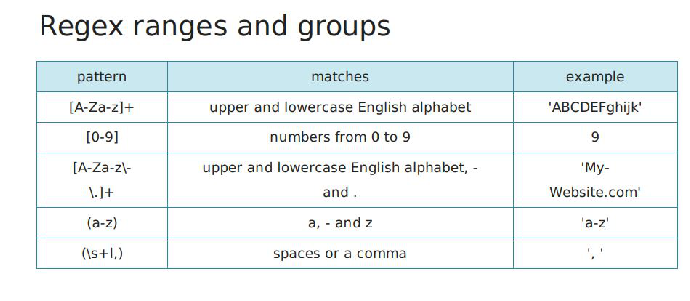

<re.Match object; span=(0, 35), match='match lowercase spaces nums like 12'>


In [10]:
#vídeo

# Regex groups using or "|"

# OR is represented using |
# You can define a group using ()
# You can define explicit character ranges using []

match_digits_and_words = ('(\d+|\w+)')

print(re.findall(match_digits_and_words, 'He has 11 cats.'), "\n")


# Regex ranges and groups
imagem = plt.imread(data_folder + "regex_ranges_and_groups.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.4, right=1.5, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()


# Character range with re.match()

my_str = 'match lowercase spaces nums like 12, but no commas'

print(re.match('[a-z0-9 ]+', my_str))


Exercício 8

In [11]:
# Choosing a tokenizer

my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

# Given my_string, which of the below patterns is the best tokenizer? 
# If possible, you want to retain sentence punctuation as separate tokens, but have '#1' remain a single token.

pattern1 = r"\w+(\?!)"
pattern2 = "(\w+|#\d|\?|!)"
pattern3 = "(#\d\w+\?!)"
pattern4 = "\s+"

from nltk.tokenize import regexp_tokenize   
#Regular-Expression Tokenizers - splits a string into substrings using a regular expression.

regexp_tokenize(my_string, pattern2)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

Exercício 9

In [12]:
# Regex with NLTK tokenization

tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) =) #nlp #python']

# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
print(regexp_tokenize(tweets[0], pattern1), "\n")

# Write a pattern that matches both mentions and hashtags
pattern2 = r"([@|#]\w+)"

# Use the pattern on the last tweet in the tweets list
print(regexp_tokenize(tweets[-1], pattern2), "\n")

# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

#################################################

# diferença para o word_tokenize()  ---> separa caracteres também
print("\n", [word_tokenize(t) for t in tweets])

['#nlp', '#python'] 

['@datacamp', '#nlp', '#python'] 

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '=)', '#nlp', '#python']]

 [['This', 'is', 'the', 'best', '#', 'nlp', 'exercise', 'ive', 'found', 'online', '!', '#', 'python'], ['#', 'NLP', 'is', 'super', 'fun', '!', '<', '3', '#', 'learning'], ['Thanks', '@', 'datacamp', ':', ')', '=', ')', '#', 'nlp', '#', 'python']]


Exercício 10

In [13]:
# Non-ascii tokenization

german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

from nltk.tokenize import regexp_tokenize, word_tokenize

# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words, "\n")

# Tokenize and print only capital words
capital_words = r"[A-Z|Ü]\w+"
print(regexp_tokenize(german_text, capital_words), "\n")

# Tokenize and print only emoji  --> see Unicode ranges for emoji 
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))


['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕'] 

['Wann', 'Pizza', 'Und', 'Über'] 

['🍕', '🚕']


#### Exercício 11 - Charting word length with NLTK

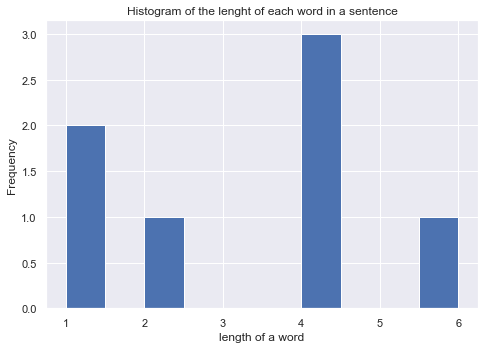

In [14]:
#vídeo

# Getting started with matplotlib
# ...

# Combining NLP data extraction with plotting

from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

words = word_tokenize("This is a pretty cool tool!")
word_lengths = [len(w) for w in words]

plt.hist(word_lengths)
plt.title("Histogram of the lenght of each word in a sentence")
plt.xlabel("length of a word")
plt.ylabel("Frequency")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 12

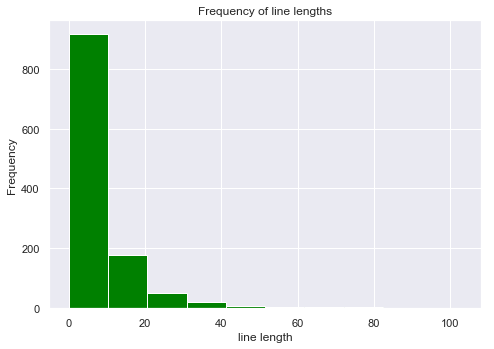

In [15]:
# Charting practice

holy_grail = open(data_folder + 'grail.txt', mode='r').read()

# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
# Use re.sub() inside a list comprehension to replace the prompts such as ARTHUR: and SOLDIER #1 --> .sub() for substitute
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words, color='green')

# Show the plot
plt.title("Frequency of line lengths")
plt.ylabel("Frequency")
plt.xlabel("line length")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# CHAPTER 2 - Simple topic identification

#### Exercício 1 - Word counts with bag-of-words

In [16]:
#vídeo

# Bag-of-words
#  - Basic method for finding topics in a text
#  - Need to first create tokens using tokenization
#  - ... and then count up all the tokens
#  - The more frequent a word, the more important it might be
#  - Can be a great way to determine the significant words in a text

# Bag-of-words example
text = "The cat is in the box. The cat likes the box. The box is over the cat."

# Bag of words (stripped punctuation):
# "The": 3;  "box": 3; "cat": 3; "the": 3
# "is": 2
# "in": 1; "likes": 1; "over": 1

from nltk.tokenize import word_tokenize
from collections import Counter

# Count the words, using Counter
counter = Counter(word_tokenize(text))

print(counter, "\n")

# most common words
print(counter.most_common(2))

Counter({'The': 3, 'cat': 3, 'the': 3, 'box': 3, '.': 3, 'is': 2, 'in': 1, 'likes': 1, 'over': 1}) 

[('The', 3), ('cat', 3)]


Exercício 2

In [17]:
# Bag-of-words picker

# Which of the below options, with basic nltk tokenization, map the bag-of-words for the following text?

text = "The cat is in the box. The cat box."

# Answer: ('The', 2), ('box', 2), ('.', 2), ('cat', 2), ('is', 1), ('in', 1), ('the', 1)


Exercício 3

In [18]:
# Building a Counter with bag-of-words

article = open(data_folder + "wiki_text_debugging.txt").read() 

# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))


[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 66), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


#### Exercício 4 - Simple text preprocessing

In [19]:
#vídeo

# Why preprocess?
# Helps make for better input data
#  - When performing machine learning or other statistical methods
# Examples:
#  - Tokenization to create a bag of words
#  - Lowercasing words
# Lemmatization/Stemming
#  - Shorten words to their root stems
# Removing stop words, punctuation, or unwanted tokens
# Good to experiment with different approaches

# Preprocessing example
# Input text: Cats, dogs and birds are common pets. So are fish.
# --> Output tokens: cat, dog, bird, common, pet, fish

# Text preprocessing with Python
from nltk.corpus import stopwords

text = "The cat is in the box. The cat likes the box. The box is over the cat."


tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]  
#                                        isalpha() --> return True if the string only has alfabetical characters

print(tokens, "\n")


no_stops = [t for t in tokens if t not in stopwords.words('english')] # --> avoid the 'stopwords' - ver lista em baixo
print("Words (with lower case) excluding stopwords: {}".format(no_stops), "\n")

# most common words, avoiding stopwords
print("2 most common words, excluding stopwords: {}".format(Counter(no_stops).most_common(2)))


['the', 'cat', 'is', 'in', 'the', 'box', 'the', 'cat', 'likes', 'the', 'box', 'the', 'box', 'is', 'over', 'the', 'cat'] 

Words (with lower case) excluding stopwords: ['cat', 'box', 'cat', 'likes', 'box', 'box', 'cat'] 

2 most common words, excluding stopwords: [('cat', 3), ('box', 3)]


In [20]:
print("List of stopwords - english:\n", stopwords.words('english'))

List of stopwords - english:
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 

Exercício 5

In [21]:
# Text preprocessing steps

# Which of the following are useful text preprocessing steps?

# Answer: Lemmatization, lowercasing, removing unwanted tokens.

Exercício 6

In [22]:
# exemplos para entender o WordNetLemmatizer()

# Lemmatization is the process of converting a word to its base form. 

# The difference between stemming and lemmatization is:
# lemmatization considers the context and converts the word to its meaningful base form, whereas 
# stemming just removes the last few characters (often leading to incorrect meanings and spelling errors.)

# For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff
# the ‘ing’ part and convert it to car.

# ‘Caring’ -> Lemmatization -> ‘Care’ ----- no WordNetLemmatizer n (plural)
# ‘Caring’ -> Stemming -> ‘Car’

###################################################################

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatize Single Word
print("WordNetLemmatizer():")
print(lemmatizer.lemmatize("bats"))
print(lemmatizer.lemmatize("are"))
print(lemmatizer.lemmatize("feet"))
print(lemmatizer.lemmatize("caring"))
print(lemmatizer.lemmatize("computers"))

###################################################################

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster=LancasterStemmer()

print("\nPorterStemmer():")
print(porter.stem("cats"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))

print("\nLancasterStemmer():")
print(lancaster.stem("cats"))
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

WordNetLemmatizer():
bat
are
foot
caring
computer

PorterStemmer():
cat
troubl
troubl
troubl

LancasterStemmer():
cat
troubl
troubl
troubl


Stemming and Lemmatization in Python: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

In [23]:
# Text preprocessing practice

article = open(data_folder + "wiki_text_debugging.txt").read() 

# Tokenize the article
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

################################################################

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
english_stops = stopwords.words('english')
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))


[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


#### Exercício 7 - Introduction to gensim

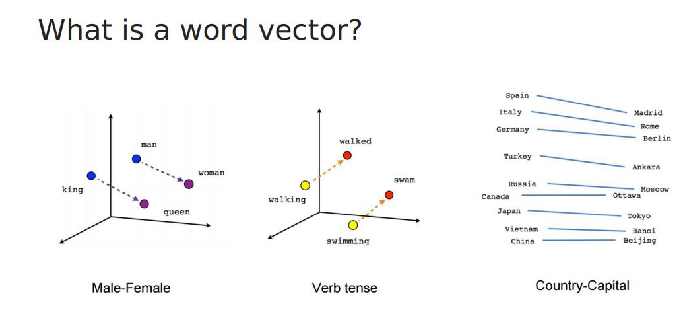

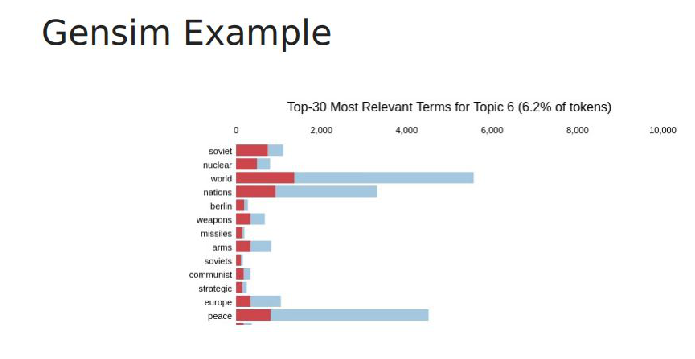

In [24]:
#vídeo

# What is gensim?

# Popular open-source NLP library
# Uses top academic models to perform complex tasks
#  - Building document or word vectors
#  - Performing topic identification and document comparison

# What is a word vector?
imagem = plt.imread(data_folder + "word_vector.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.4, right=1.5, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# word embedding == vector (same meaning) is trained from a larger corpus and is a multidimensional representation of a word
# it's like a multidimensional array, with 0's and 1's.
# with these vectors we can then see relationships among the words or documents based on how near or far they are, and also
#   what similar comparisons we find.
# For example, in the graphic we see that the vector operation ('king' - 'queen') is approx. equal to ('man' - 'woman')
# or that 'Spain' is to 'Madrid' as 'Russia' is to 'Moscow'
# the deep learning algorithm used to create word vectors has been able to distill this meaning based on how those words
#  are used throughout the text


# gensim example --> example of LDA (Latent Dirichlet Allocation) visualization.

# LDA (Latent Dirichlet Allocation) is a statistical model that we can apply to text using gensim for topic analysis
# and modeling. ---> o gráfico vem de um artigo, ver: http://tlfvincent.github.io/2015/10/23/presidential-speech-topics/

# What is a word vector?
imagem = plt.imread(data_folder + "gensim_example.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.4, right=1.5, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# (continua)

In [25]:
# Creating a gensim dictionary
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

# a corpus, or in the plural corpora, is a set of text used to perform NLP tasks.

my_documents = ['The movie was about a spaceship and aliens.', 'I really liked the movie!',
                'Awesome action scenes, but boring characters.', 'The movie was awful! I hate alien films.',
                'Space is cool! I liked the movie.', 'More space films, please please!',]

tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]  # aqui só vemos o caso simples de letras pequenas, 
                                                                      # mas podíamos tb retirar a pontuação, stopwords, etc

# pass the tokenized documents to the gensim Dictionary class
dictionary = Dictionary(tokenized_docs)  # this creates a mapping with an id for each token - the beggining of our corpus

print(dictionary, "\n")  # we now represent whole documents using just a list of their token ids and how often the tokens
                        # appear in each document

print(dictionary.token2id)


# Creating a gensim corpus

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

corpus   
# a list of lists. Each list item represents one document. 
# Each document is a series of tuples, where the 1st item is the token id from the dictionary, and the 2nd item represents
# the token frequency in the document

##################

# --> gensim models can be easily saved, updated, and reused.
# Our dictionary can also be updated.
# This more advanced and feature rich bag-of-words can be used in future exercises.


Dictionary(29 unique tokens: ['.', 'a', 'about', 'aliens', 'and']...) 

{'.': 0, 'a': 1, 'about': 2, 'aliens': 3, 'and': 4, 'movie': 5, 'spaceship': 6, 'the': 7, 'was': 8, '!': 9, 'i': 10, 'liked': 11, 'really': 12, ',': 13, 'action': 14, 'awesome': 15, 'boring': 16, 'but': 17, 'characters': 18, 'scenes': 19, 'alien': 20, 'awful': 21, 'films': 22, 'hate': 23, 'cool': 24, 'is': 25, 'space': 26, 'more': 27, 'please': 28}


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 2)]]

Exercício 8

In [26]:
# What are word vectors?

# What are word vectors and how do they help with NLP?

# Word vectors are multi-dimensional mathematical representations of words created using deep learning methods. They give
# us insight into relationships between words in a corpus.

Exercício 9

In [27]:
# Creating and querying a corpus with gensim

articles = open(data_folder + "wiki_text_language.txt").read()
articles = [regexp_tokenize(w.lower(), '\w+') for w in sent_tokenize(articles) if w not in stopwords.words('english')]

##################################################

# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word 'ids' with their frequency counts from the fifth document
print(corpus[4][:10])


computer
[(0, 2), (5, 2), (6, 1), (9, 2), (11, 3), (14, 3), (29, 2), (36, 1), (38, 2), (46, 1)]


Exercício 10

In [28]:
# Gensim bag-of-words

from collections import defaultdict
import itertools

# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
###############################################################
print("\n")
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
    
# Create a sorted list from the defaultdict, using words across the entire corpus: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, freq in sorted_word_count[:5]:
    print(dictionary.get(word_id), freq)


programming 3
the 3
a 2
high 2
level 2


the 69
language 57
and 54
level 52
a 49


#### Exercício 11 - Tf-idf with gensim

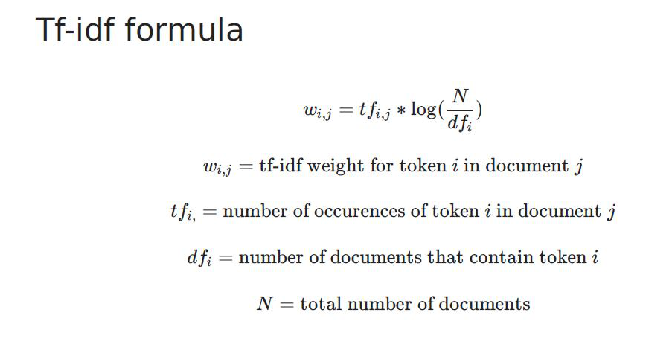

[(6, 0.05529925127792695),
 (8, 0.04112094337227637),
 (9, 0.044354995274914974),
 (10, 0.04777939226531257),
 (11, 0.07408400383127389),
 (16, 0.2512689949322082),
 (17, 0.2512689949322082),
 (18, 0.0830552587298975),
 (19, 0.2512689949322082),
 (20, 0.170589492953574),
 (21, 0.2512689949322082),
 (22, 0.18733200232571143),
 (23, 0.21092924394289114),
 (24, 0.2512689949322082),
 (25, 0.15760299376935255),
 (26, 0.21092924394289114),
 (27, 0.2512689949322082),
 (28, 0.09768124544845357),
 (29, 0.0799086568192249),
 (30, 0.11726324278003541),
 (31, 0.26049948392851374),
 (32, 0.2512689949322082),
 (33, 0.17981998194987944),
 (34, 0.2512689949322082),
 (35, 0.18733200232571143),
 (36, 0.1189160342254356),
 (37, 0.341178985907148)]

In [29]:
#vídeo

# What is tf-idf?  (term frequency-inverse document frequency)

# Term frequency - inverse document frequency
#  - Allows you to determine the most important words in each document
#  - Each corpus may have shared words beyond just stopwords
#  - These words should be down-weighted in importance
#  - Example from astronomy: "Sky" --> iríamos querer dar menos peso a essa palavra
#  - Ensures most common words don't show up as key words
#  - Keeps document specific frequent words weighted high

# Tf-idf formula
imagem = plt.imread(data_folder + "tf-idf_formula.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.2, right=1.4, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()


# Tf-idf with gensim
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)

tfidf[corpus[1]]

Exercício 12

In [30]:
# What is tf-idf?

# You want to calculate the tf-idf weight for the word "computer", which appears five times in a document containing 
# 100 words. Given a corpus containing 200 documents, with 20 documents mentioning the word "computer", tf-idf can be 
# calculated by multiplying term frequency with inverse document frequency.

# Term frequency = percentage share of the word compared to all tokens in the document  

# Inverse document frequency = logarithm of the total number of documents in a corpora divided by the number of documents
# containing the term

# Which of the below options is correct?

tf_idf_weight_computer = 5/100 * np.log(200/20)
tf_idf_weight_computer

0.1151292546497023

Exercício 13

In [31]:
# Tf-idf with Wikipedia

articles = open(data_folder + "wiki_text_language.txt").read()
articles = [regexp_tokenize(w.lower(), '\w+') for w in sent_tokenize(articles) if w not in stopwords.words('english')]

from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(articles)

corpus = [dictionary.doc2bow(article) for article in articles]

doc = corpus[4]   #5th sentence

##################################################################################

# Import TfidfModel
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

########################################
print("\n")

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)


[(0, 0.0526662943798356), (5, 0.06550523482801611), (6, 0.029376563918517628), (9, 0.047125316299506094), (11, 0.11806670562054172)]


glossary 0.2669627352916454
autocodes 0.22410344710928345
faber 0.22410344710928345
london 0.22410344710928345
web 0.22410344710928345


# Chapter 3 - Named-entity recognition

#### Exercício 1 - Named Entity Recognition

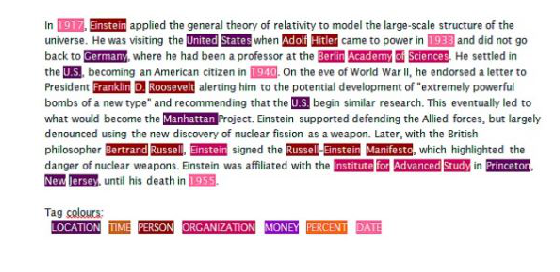

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP'), (',', ','), ('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('ride', 'VB'), ('the', 'DT'), ('Metro', 'NNP'), ('to', 'TO'), ('visit', 'VB'), ('MOMA', 'NNP'), ('and', 'CC'), ('some', 'DT'), ('restaurants', 'NNS'), ('rated', 'VBN'), ('well', 'RB'), ('by', 'IN'), ('Ruth', 'NNP'), ('Reichl', 'NNP'), ('.', '.')] 

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


In [32]:
#vídeo

# What is Named Entity Recognition (NER)?

# NLP task to identify important named entities in the text
#  - People, places, organizations
#  - Dates, states, works of art
#  - ... and other categories!

# Can be used alongside topic identification
#  - ... or on its own!

# ----> Who? What? When? Where?


# Example of NER: 
imagem = plt.imread(data_folder + "NER_example.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# nltk and the Stanford CoreNLP Library
# The Stanford CoreNLP library:
#  --> Integrated into Python via nltk
#  - Java based
#  - Support for NER as well as coreference and dependency trees


# Using nltk for Named Entity Recognition
import nltk

sentence = 'In New York, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichl.'

tokenized_sent = nltk.word_tokenize(sentence)

# pos_tag (tag the sentence)
tagged_sent = nltk.pos_tag(tokenized_sent)  # --> tags for nouns, pronouns, adjectives, verbs, etc (english grammar)

print(tagged_sent, "\n")


# nltk.ne_chunk (tree)
print(nltk.ne_chunk(tagged_sent))

# returns the sentence as a tree. They have leaves and etc that envolves grammar
# uses trained statistical and grammatical parsers! and not wikipedia or google

Exercício 2

In [33]:
# NER with NLTK

article = open(data_folder + "uber_apple.txt", encoding="utf8").read()  #encoding="utf8"

from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

#########################################

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute 
# label, and if the chunk.label() is equal to "NE". If so, print that chunk.
# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


In [34]:
# hasattr --> Python Standard Library ---> https://www.programiz.com/python-programming/methods/built-in/hasattr

# The hasattr() method returns true if an object has the given named attribute and false if it does not.
# hasattr(object, name)

# object - object whose named attribute is to be checked
# name - name of the attribute to be searched


Exercício 3

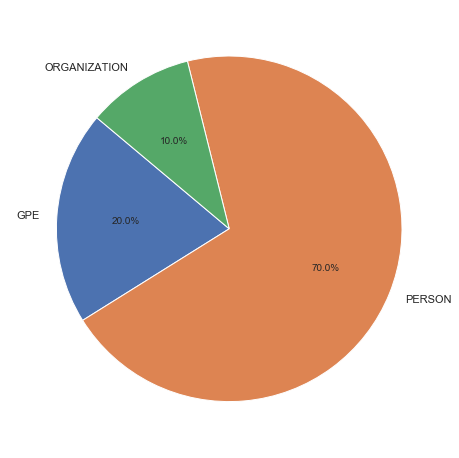

defaultdict(int, {'GPE': 2, 'PERSON': 7, 'ORGANIZATION': 1})

In [35]:
# Charting practice

article = open(data_folder + "uber_apple.txt", encoding="utf8").read()
sentences = nltk.sent_tokenize(article)
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
chunked_sentences = nltk.ne_chunk_sents(pos_sentences)

############################

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.subplots_adjust(left=0, bottom=-0.5, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

ner_categories

Exercício 4

In [36]:
# Stanford library with NLTK

# When using the Stanford library with NLTK, what is needed to get started?

# Answer: NLTK, the Stanford Java Libraries and some environment variables to help with integration.

#### Exercício 5 - Introduction to SpaCy

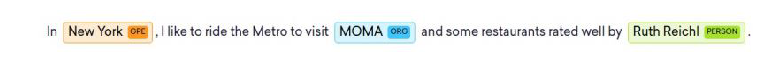

(Berlin, Germany, Angela Merkel)
Berlin GPE
Germany GPE
Angela Merkel PERSON


In [37]:
#vídeo

# What is SpaCy?
# NLP library similar to gensim, with different implementations
# Focus on creating -- NLP pipelines -- to generate models and corpora
# Open-source, with extra libraries and tools
#  - Displacy --> visualization tool for viewing parse trees, which uses.. to create interactive text


# Displacy entity recognition visualizer
imagem = plt.imread(data_folder + "displacy_entity_recognition.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.4, right=1.7, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()


# SpaCy NER
import spacy 

# it's possible to train and load vectors on our own ---> aqui só temos o básico

nlp = spacy.load('en')

print(nlp.entity)

doc = nlp("Berlin is the capital of Germany; and the residence of Chancellor Angela Merkel.")

print(doc.ents)

print(doc.ents[0], doc.ents[0].label_)
print(doc.ents[1], doc.ents[1].label_)
print(doc.ents[2], doc.ents[2].label_)

# Why use SpaCy for NER?
#  - Easy pipeline creation
#  --> Different entity types compared to nltk
#  - Informal language corpora
#    -> Easily find entities in Tweets and chat messages
#  - Quickly growing!


Exercício 6

In [38]:
# Comparing NLTK with spaCy NER

article = open(data_folder + "uber_apple.txt", encoding="utf8").read()

# To minimize execution times, you'll be asked to specify the keyword arguments tagger=False, parser=False, matcher=False 
# when loading the spaCy model, because you only care about the entity in this exercise.

# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)
    

GPE Uber
PERSON Uber
ORG Apple
PERSON Uber
PERSON Uber
PERSON Uber
GPE Travis Kalanick
GPE Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber’s
LOC Silicon Valley’s
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


Exercício 7

In [39]:
# spaCy NER Categories

# Which are the extra categories that spacy uses compared to nltk in its named-entity recognition?

print("""Extra categories that spacy uses compared to nltk in its named-entity recognition:\n
NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT""")


Extra categories that spacy uses compared to nltk in its named-entity recognition:

NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT


#### Exercício 8 - Multilingual NER with polyglot

In [40]:
#vídeo

# What is polyglot?

# NLP library which uses word vectors
# Why polyglot?
#  - Vectors for many different languages --> more than 130. É bom para línguas estrangeiras

# Spanish NER with polyglot
from polyglot.text import Text

text = """El presidente de la Generalitat de Cataluña, Carles Puigdemont, ha afirmado hoy a la alcaldesa de Madrid, 
Manuela Carmena, que en su etapa de alcalde de Girona (de julio de 2011 a enero de 2016) hizo una gran promoción de 
Madrid."""

ptext = Text(text)
print(ptext)

ptext.entities

# não é preciso especificar a língua ao polyglot: faz automaticamente

El presidente de la Generalitat de Cataluña, Carles Puigdemont, ha afirmado hoy a la alcaldesa de Madrid, 
Manuela Carmena, que en su etapa de alcalde de Girona (de julio de 2011 a enero de 2016) hizo una gran promoción de 
Madrid.


[I-ORG(['Generalitat', 'de']),
 I-LOC(['Generalitat', 'de', 'Cataluña']),
 I-PER(['Carles', 'Puigdemont']),
 I-LOC(['Madrid']),
 I-PER(['Manuela', 'Carmena']),
 I-LOC(['Girona']),
 I-LOC(['Madrid'])]

In [41]:
from polyglot.detect import Detector
detector = Detector(text)
print(detector.language)

############################################################

mixed_text = """ China (simplified Chinese: 中国; traditional Chinese: 中國),
officially the People's Republic of China (PRC), is a soverei n state located in East Asia"""

for language in Detector(mixed_text).languages:
    print(language)

print("\n", Text(mixed_text).entities)

name: espanhol    code: es       confidence:  99.0 read bytes:   414
name: inglês      code: en       confidence:  87.0 read bytes:  1124
name: chinês      code: zh_Hant  confidence:   5.0 read bytes:  1755
name: un          code: un       confidence:   0.0 read bytes:     0

 [I-LOC(['China']), I-LOC(["People's", 'Republic', 'of', 'China']), I-LOC(['East', 'Asia'])]


https://polyglot.readthedocs.io/en/latest/index.html        -->Documentation

Exercício 9

In [42]:
# French NER with polyglot I

article = open(data_folder + "french.txt", encoding="utf8").read()

from polyglot.text import Text

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print("\n", type(ent))


['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']

 <class 'polyglot.text.Chunk'>


Exercício 10

In [43]:
# French NER with polyglot II

# Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, 
# and the second element is the full string of the entity text.

# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
entities


[('I-PER', 'Charles Cuvelliez'),
 ('I-PER', 'Charles Cuvelliez'),
 ('I-ORG', 'Bruxelles'),
 ('I-PER', 'l’IA'),
 ('I-PER', 'Julien Maldonato'),
 ('I-ORG', 'Deloitte'),
 ('I-PER', 'Ethiquement'),
 ('I-LOC', 'l’IA'),
 ('I-PER', '.')]

Exercício 11

In [44]:
# Spanish NER with polyglot

article = """Lina del Castillo es profesora en el Instituto de Estudios Latinoamericanos Teresa Lozano Long (LLILAS) y el Departamento de Historia de la Universidad de Texas en Austin. Ella será la moderadora del panel “Los Mundos Políticos de Gabriel García Márquez” este viernes, Oct. 30, en el simposio Gabriel García Márquez: Vida y Legado.
LIna del Castillo
Actualmente, sus investigaciones abarcan la intersección de cartografía, disputas a las demandas de tierra y recursos, y la formación del n...el tren de medianoche que lleva a miles y miles de cadáveres uno encima del otro como tantos racimos del banano que acabarán tirados al mar. Ningún recuento periodístico podría provocar nuestra imaginación y nuestra memoria como este relato de García Márquez.
Contenido Relacionado
Lea más artículos sobre el archivo de Gabriel García Márquez
Reciba mensualmente las últimas noticias e información del Harry Ransom Center con eNews, nuestro correo electrónico mensual. ¡Suscríbase hoy!"""

from polyglot.text import Text

txt = Text(article)

# Initialize the count variable: count
count = 0

# Check whether the entity contains 'Márquez' or 'Gabo'
for ent in txt.entities:
    if 'Márquez' in ent or 'Gabo' in ent:
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)

print(percentage)

4
0.26666666666666666


# Chapter 4 - Building a "fake news" classifier

#### Exercício 1 - Classifying fake news using supervised learning with NLP

In [45]:
#vídeo

# Supervised learning with NLP
#  - Need to use language instead of geometric features
#  - scikit-learn: Powerful open-source library
#  - How to create supervised learning data from text?
#    - Use bag-of-words models or tf-idf as features

# IMDB Movie Dataset
#  - Goal: Predict movie genre based on plot summary
#  - Categorical features generated using preprocessing

# Supervised learning steps:
#  - Collect and preprocess our data
#  - Determine a label (Example: Movie genre)
#  - Split data into training and test sets
#  - Extract features from the text to help predict the label
#    - Bag-of-words vector built into scikit-learn
#  - Evaluate trained model using the test set


Exercício 2

In [46]:
# Which possible features?

# Which of the following are possible features for a text classification problem?

# 1. Number of words in a document.
# 2. Specific named entities.
# 3. Language.
# 4. All of the above. (True)

Exercício 3

In [47]:
# Training and testing
# What datasets are needed for supervised learning?

# Answer: Both training and testing data.

#### Exercício 4 - Building word count vectors with scikit-learn

In [48]:
%%script false
#vídeo

# Predicting movie genre

# Dataset consisting of movie plots and corresponding genre
# Goal: Create bag-of-word vectors for the movie plots
#  - Can we predict genre based on the words used in the plot summary?

# Count Vectorizer with Python
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

df = ... # Load data into DataFrame

y = df['Sci-Fi']  # 1 if Sci-fi, 0 if Action
X_train, X_test, y_train, y_test = train_test_split(df['plot'], y, test_size=0.33, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')  # similar to the gensim corpus

count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)


Couldn't find program: 'false'


Exercício 5

In [49]:
# CountVectorizer for text classification

df = pd.read_csv(data_folder + "fake_or_real_news.csv")

# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create a series to store the labels: y
y = df['label']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

df.head()

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Exercício 6

In [50]:
# TfidfVectorizer for text classification

# Similar to the sparse CountVectorizer created in the previous exercise, you'll work on creating tf-idf vectors for your
# documents. ---> TfidfVectorizer --> 'Equivalent to CountVectorizer followed by TfidfTransformer.'

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# max_df :(default=1.0) When building the vocabulary ignore terms that have a document frequency strictly higher than
# the given threshold (corpus-specific stop words).

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10], "\n")

# Print the first 5 vectors of the tfidf training data
print(tfidf_train[:5])


['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km'] 

  (1, 42470)	0.07711040274149526
  (1, 12105)	0.15008066461476866
  (1, 54177)	0.13782629144711137
  (1, 50628)	0.061296988343109586
  (1, 15924)	0.3479045460649079
  (1, 44520)	0.4973826512693341
  (1, 51896)	0.11596517664605868
  (1, 35783)	0.30902690818827977
  (1, 35256)	0.12628385718450857
  (1, 21881)	0.21271688045815978
  (1, 42534)	0.06081715886809217
  (1, 8399)	0.08729542880625335
  (1, 29531)	0.1454406205718245
  (1, 15927)	0.4973826512693341
  (1, 25686)	0.13550453594288983
  (1, 49203)	0.1672740861784377
  (1, 16814)	0.10404977746548139
  (1, 36087)	0.12648679854389897
  (1, 21568)	0.1007920919566398
  (1, 25684)	0.1030420922189754
  (1, 38823)	0.06048803110658644
  (1, 47506)	0.14539060877460044
  (1, 36831)	0.10772488937433067
  (2, 16972)	0.1606296088662543
  (2, 762)	0.48803966069171073
  :	:
  (4, 19325)	0.05452053080897492
  (4, 7259)	0.06755319386644243
  (4, 51456)	0.06475353

Exercício 7

In [51]:
# Inspecting the vectors   ---> converting them into pandas DataFrames

# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head(), "\n")

# Print the head of tfidf_df
print(tfidf_df.head(), "\n")

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference, "\n")

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...    \
0   0    0     0         0       0      0     0       0      0      0  ...     
1   0    0     0         0       0      0     0       0      0      0  ...     
2   0    0     0         0       0      0     0       0      0      0  ...     
3   0    0     0         0       0      0     0       0      0      0  ...     
4   0    0     0         0       0      0     0       0      0      0  ...     

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns] 

    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...    \
0  0.0  0.0   0.0       0.0     0.0    0.0  

#### Exercício 8 - Training and testing a classification model with scikit-learn

In [52]:
#vídeo

# Naive Bayes classifier

# Naive Bayes Model

#  - Commonly used for testing NLP classification problems
#  - Basis in probability
#  - Given a particular piece of data, how likely is a particular outcome?
# Examples:
#  - If the plot has a spaceship, how likely is it to be sci-fi?
#  - Given a spaceship and an alien, how likely now is it sci-fi?

#  --> Each word from CountVectorizer acts as a feature
#  - Naive Bayes: Simple and effective - é usado desde os anos 60, mesmo que n seja sp o melhor, mas simples e eficaz


# Naive Bayes with scikit-learn
from sklearn.naive_bayes import MultinomialNB  

# MultinomialNB
# works well with countvectorizers as it expects integers as inputs
# also used for multi label classification. This model may not work as well with floats, such as tfidf weightedinputs 
# --> INSTEAD, use SVM or even linear models, although it is recommended to try NaiveBayes first to see if it can also work.

from sklearn.metrics import confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

# score
print("Accuracy score: {}".format(accuracy_score(y_test, pred)), "\n")

# Confusion Matrix
print("Confusion matrix:\n", confusion_matrix(y_test, pred, labels=['FAKE', 'REAL']))   # 1 if fake, 0 if real


Accuracy score: 0.893352462936394 

Confusion matrix:
 [[ 865  143]
 [  80 1003]]


Exercício 9

In [53]:
# Text classification models

# Which of the below is the most reasonable model to use when training a new supervised model using text vector data?
# answer: Naybe Bayes

Exercício 10

In [54]:
# Training and testing the "fake news" model with CountVectorizer

# Import the necessary modules
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
y_pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, y_pred)
print(score)

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(cm)


0.893352462936394
[[ 865  143]
 [  80 1003]]


Exercício 11

In [55]:
# Training and testing the "fake news" model with TfidfVectorizer

# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
y_pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, y_pred)
print(score)

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(cm)


0.8565279770444764
[[ 739  269]
 [  31 1052]]


#### Exercício 12 - Simple NLP, complex problems

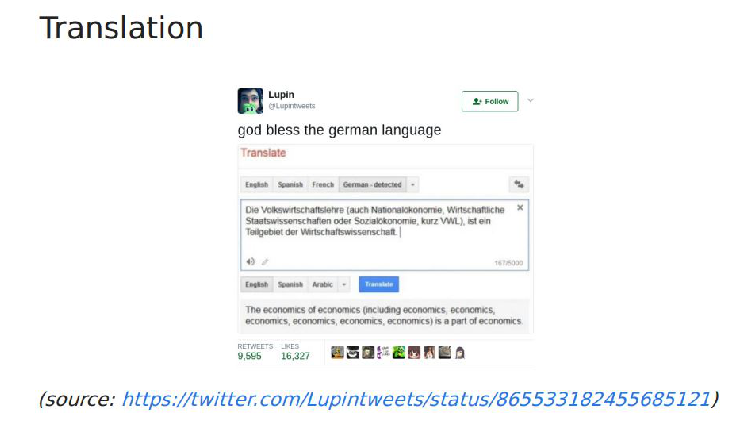

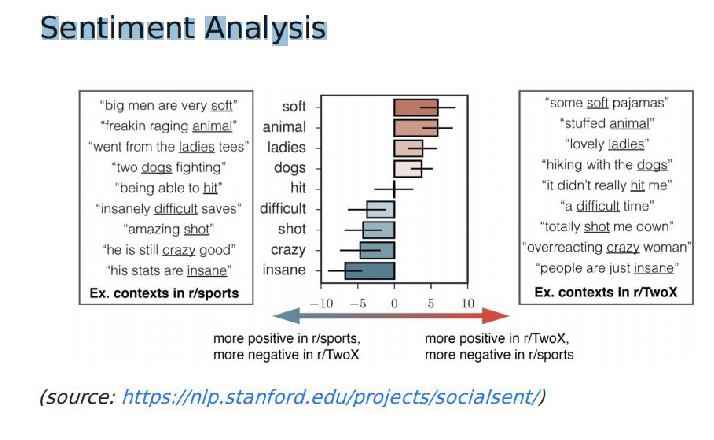

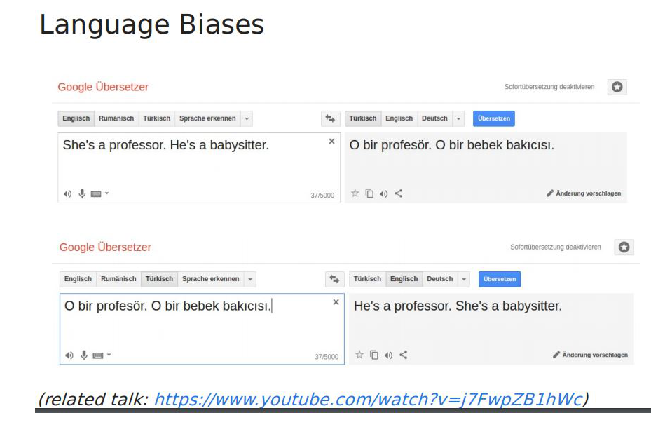

In [56]:
#vídeo

# Translation
imagem = plt.imread(data_folder + "translation.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.4, right=1.7, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# Sentiment Analysis
imagem = plt.imread(data_folder + "sentiment_analysis.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.4, right=1.7, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# Language Biases
imagem = plt.imread(data_folder + "language_biases.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.4, right=1.7, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()


Exercício 13

In [57]:
# Improving the model

# What are possible next steps you could take to improve the model?

# Tweaking alpha levels.
# Trying a new classification model.
# Training on a larger dataset.
# Improving text preprocessing.
# All of the above. (True)


Exercício 14

In [58]:
# Improving your model

# test a few different alpha levels using the Tfidf vectors to determine if there is a better performing combination.
tfidf_vectorizer
tfidf_train
tfidf_test
##############

# Create the list of alphas: alphas
alphas = np.arange(1.0e-10, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
scores = []

for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    scores.append(train_and_predict(alpha))


# Highest score and chosen alpha    
print("Highest score: {}; Alpha: {}".format(np.max(scores), alphas[np.argmax(scores)]))

Alpha:  1e-10
Score:  0.8813964610234337

Alpha:  0.1000000001
Score:  0.8976566236250598

Alpha:  0.20000000010000002
Score:  0.8938307030129125

Alpha:  0.30000000010000005
Score:  0.8900047824007652

Alpha:  0.40000000010000003
Score:  0.8857006217120995

Alpha:  0.5000000001
Score:  0.8842659014825442

Alpha:  0.6000000001000001
Score:  0.874701099952176

Alpha:  0.7000000001000001
Score:  0.8703969392635102

Alpha:  0.8000000001
Score:  0.8660927785748446

Alpha:  0.9000000001
Score:  0.8589191774270684

Highest score: 0.8976566236250598; Alpha: 0.1000000001


Exercício 15

In [59]:
# Inspecting your model

# Now that you have built a "fake news" classifier, you'll investigate what it has learned. You can map the important 
# vector weights back to actual words using some simple inspection techniques.

nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(tfidf_train, y_train)
tfidf_vectorizer  
#########################

# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20], "\n")

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


FAKE [(-12.641778440826338, '0000'), (-12.641778440826338, '000035'), (-12.641778440826338, '0001'), (-12.641778440826338, '0001pt'), (-12.641778440826338, '000km'), (-12.641778440826338, '0011'), (-12.641778440826338, '006s'), (-12.641778440826338, '007'), (-12.641778440826338, '007s'), (-12.641778440826338, '008s'), (-12.641778440826338, '0099'), (-12.641778440826338, '00am'), (-12.641778440826338, '00p'), (-12.641778440826338, '00pm'), (-12.641778440826338, '014'), (-12.641778440826338, '015'), (-12.641778440826338, '018'), (-12.641778440826338, '01am'), (-12.641778440826338, '020'), (-12.641778440826338, '023')] 

REAL [(-6.790929954967984, 'states'), (-6.765360557845786, 'rubio'), (-6.751044290367751, 'voters'), (-6.701050756752027, 'house'), (-6.695547793099875, 'republicans'), (-6.6701912490429685, 'bush'), (-6.661945235816139, 'percent'), (-6.589623788689862, 'people'), (-6.559670340096453, 'new'), (-6.489892292073901, 'party'), (-6.452319082422527, 'cruz'), (-6.452076515575875

# Fim